# **Calories Burnt Prediction**

**Importing Libraries**

In [146]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
sns.set()
import warnings
warnings.filterwarnings('ignore')
import joblib
import pickle

**Data Loading and Reading**

In [ ]:
#!pip install opendatasets

In [ ]:
import opendatasets
dataset_url = 'https://www.kaggle.com/datasets/fmendes/fmendesdat263xdemos'
opendatasets.download(dataset_url)

In [8]:
calories_path = '/content/fmendesdat263xdemos/calories.csv'
exercise_path = '/content/fmendesdat263xdemos/exercise.csv'


In [12]:
# loading data from csv file to Pandas dataframe
calories_data = pd.read_csv(calories_path)
exercise_data = pd.read_csv(exercise_path)


In [14]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [ ]:
#make copies of the original dataset
excercise_copy = exercise_data.copy()
calories_copy = calories_data.copy()


In [18]:
#seperate a Calories column from calories_data and then append to exercise_data
target = calories_data['Calories']
exercise_data['Calories'] = target

In [23]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [24]:
#shape of the dataset
exercise_data.shape

(15000, 9)

In [25]:
#columns of the datasets
exercise_data.columns

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories'],
      dtype='object')

In [27]:
#information about the dataset
exercise_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [28]:
#dtypes of the dataset
exercise_data.dtypes

User_ID         int64
Gender         object
Age             int64
Height        float64
Weight        float64
Duration      float64
Heart_Rate    float64
Body_Temp     float64
Calories      float64
dtype: object

In [29]:
# statistical information about numerical columns
exercise_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [30]:
#categorical column statistics
exercise_data.describe(include='object')

,Gender
count,15000
unique,2
top,female
freq,7553


In [31]:
#checking for missing values
exercise_data.isnull().sum()


User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

**Data Visualization**

In [33]:
# drop User_ID
exercise_data = exercise_data.drop('User_ID',axis=1)
exercise_data.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [36]:
numerical_columns =list(exercise_data.select_dtypes(['int64','float64']).columns)
len(numerical_columns)

7

In [55]:
# visualizing numerical columns using boxplot,violinplot,histogram,kde,
def make_plot(plot_kind,numerical_columns):
  plot_func = {
      'violin':sns.violinplot,
      'box':sns.boxplot,
      'kde':sns.kdeplot,
      'hist': plt.hist
  }
  fig = plt.figure(figsize=(15,10))
  for index,column in enumerate(numerical_columns):
    axis = fig.add_subplot(3,3,index+1)
    if plot_kind not in ['hist','kde']:
      plot_func[plot_kind](y=exercise_data[column],ax=axis)
      plt.title(f'{plot_kind} plot for {column}')
    else:
      plot_func[plot_kind](exercise_data[column])
      plt.title(f'{plot_kind} plot for {column}')
  plt.tight_layout()
  plt.show()



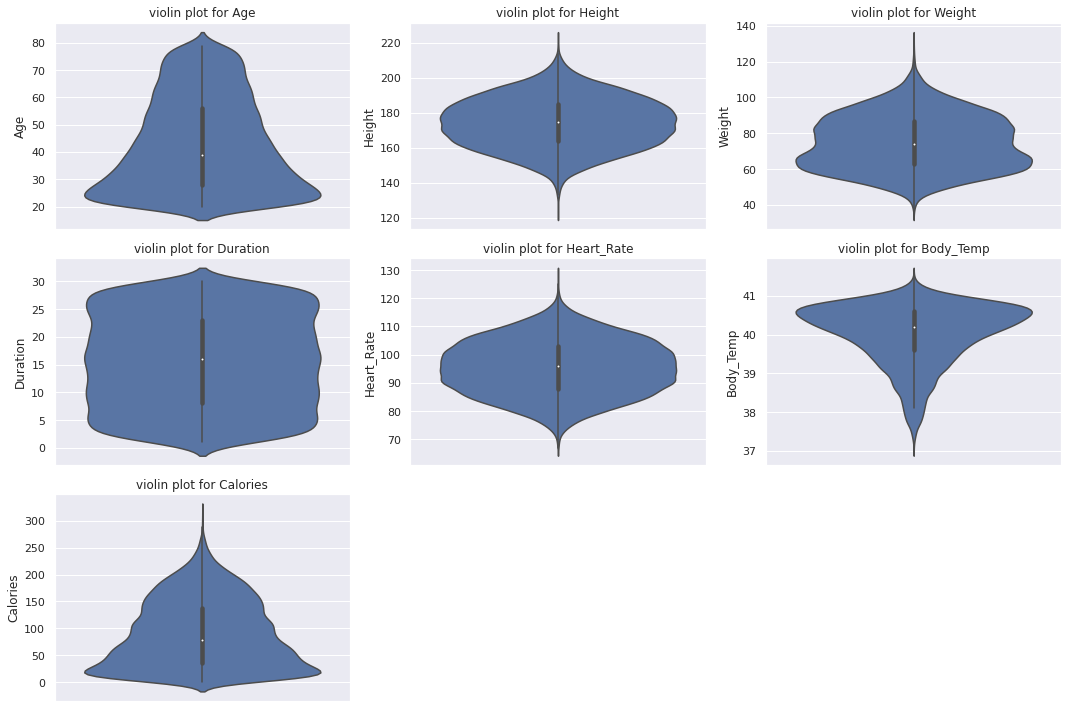

In [57]:
#violinplot
make_plot('violin',numerical_columns)

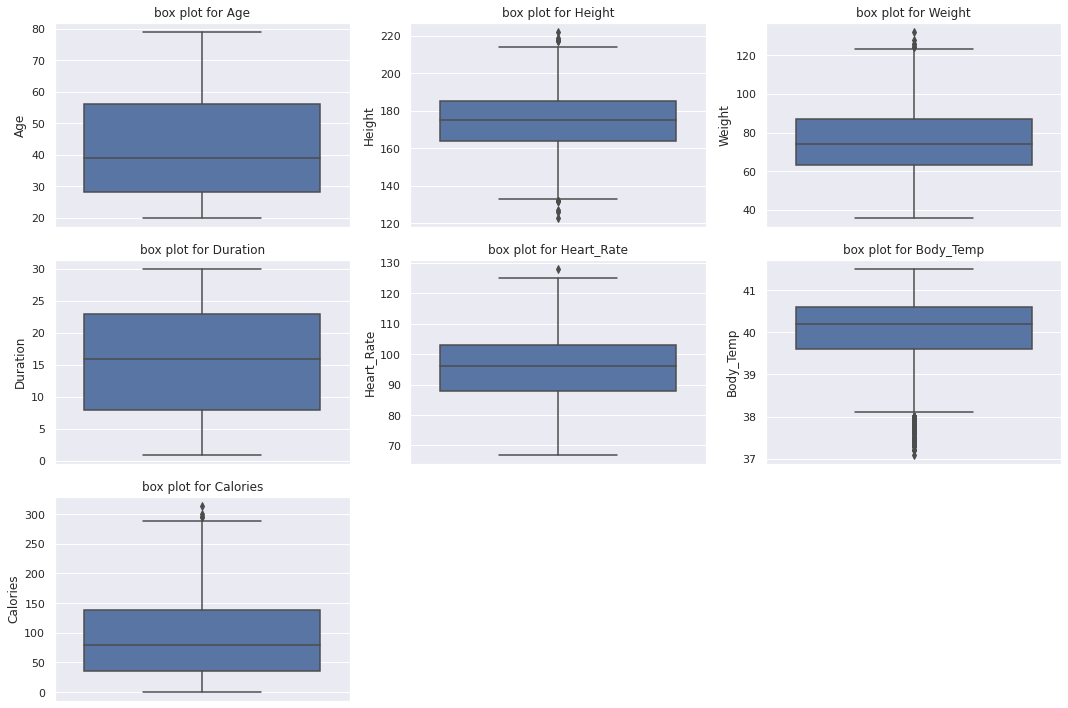

In [58]:
# boxplot
make_plot('box',numerical_columns)

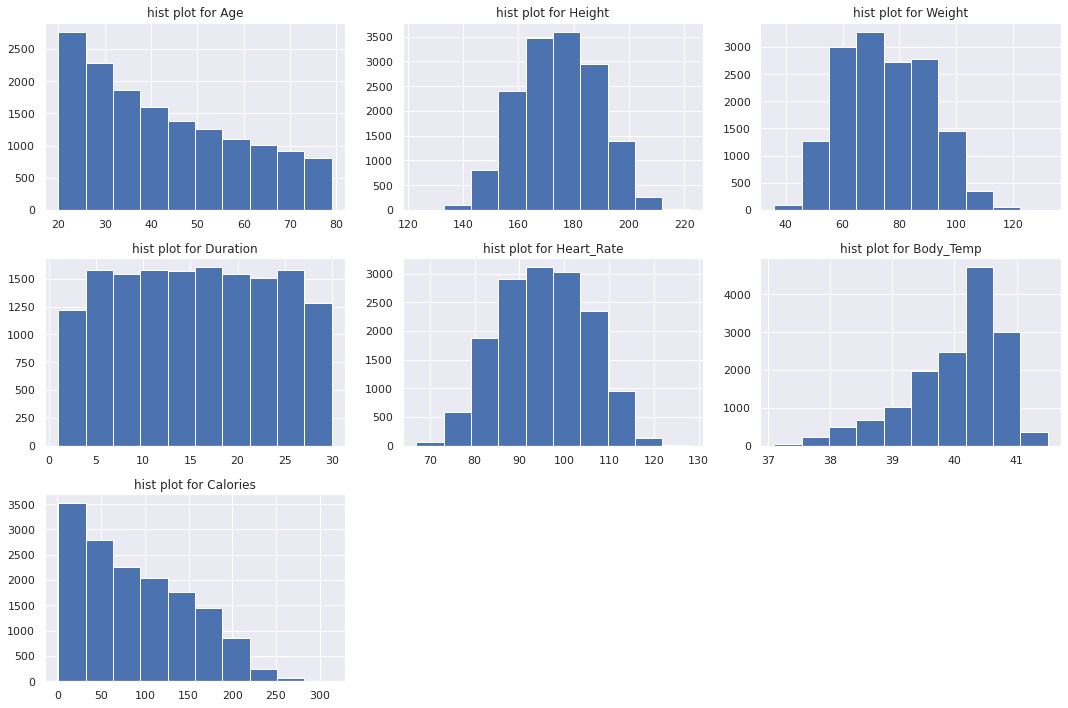

In [59]:
# barplot
make_plot('hist',numerical_columns)

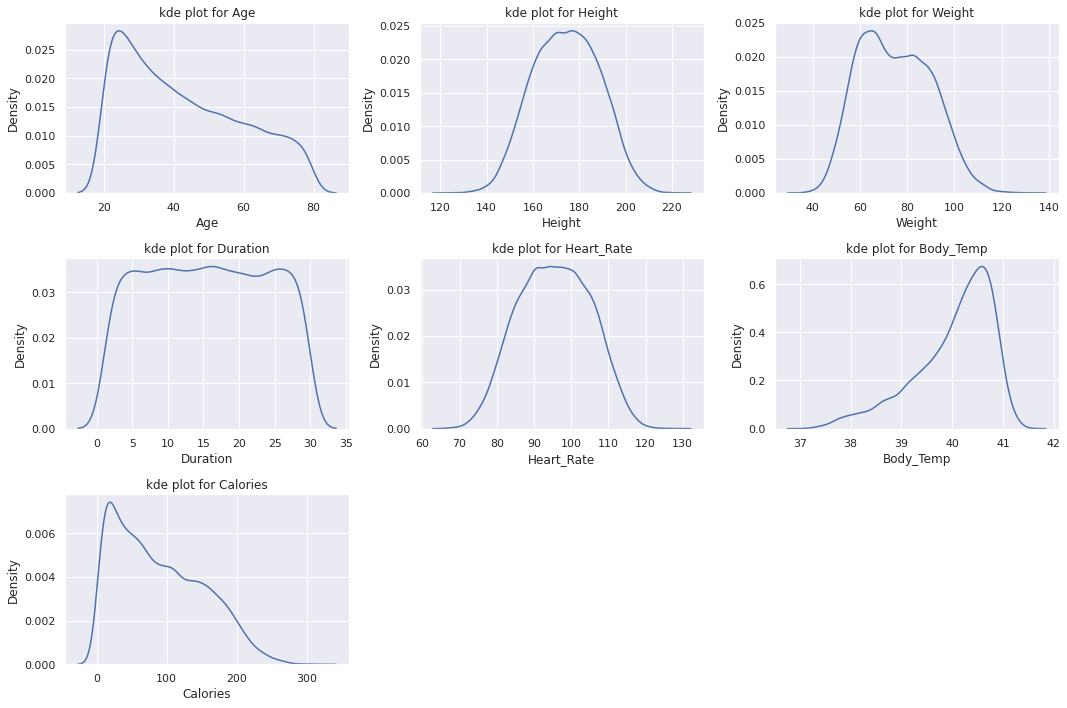

In [60]:
# kde plot
make_plot('kde',numerical_columns)

In [64]:
#Gender
gender = exercise_data['Gender'].value_counts()
gender

female    7553
male      7447
Name: Gender, dtype: int64

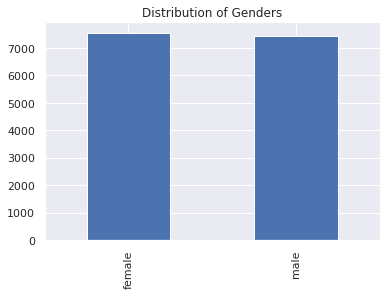

In [67]:
#Gender Distributions
gender.plot(kind='bar')
plt.title('Distribution of Genders')
plt.show()

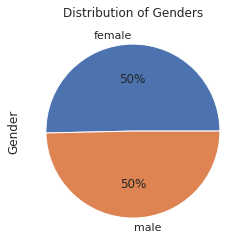

In [66]:
#Gender Distributions
gender.plot(kind='pie',autopct = '%.f%%')
plt.title('Distribution of Genders')
plt.show()

In [68]:
exercise_data.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0


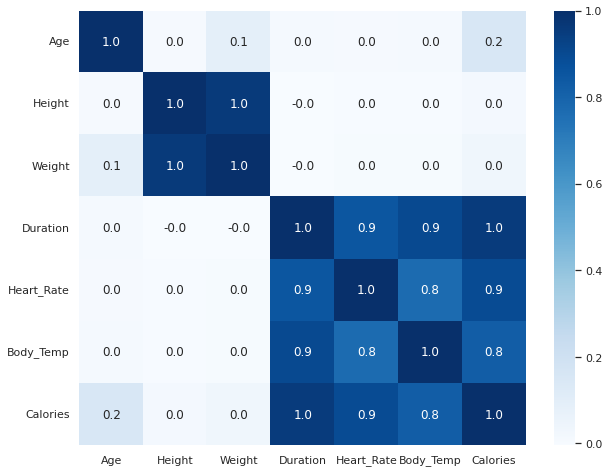

In [86]:
#correlation_matrix
plt.figure(figsize=(10,8))
correlation = exercise_data.corr()
sns.heatmap(correlation,annot=True,fmt='.1f',cbar=True,cmap='Blues')
plt.show()

**Gender column label encoding**

In [96]:
exercise_data.replace({'Gender':{'male':0,'female':1}},inplace=True)


In [97]:
exercise_data.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,1,27,154.0,58.0,10.0,81.0,39.8,35.0


In [98]:
# seperate features and target
features = exercise_data.drop('Calories',axis=1)
target = exercise_data['Calories']

In [101]:
# split the data into train,test 
train_data,test_data,train_labels,test_labels = train_test_split(features,target,test_size=0.2,random_state=3)

In [102]:
print(features.shape,train_data.shape,test_data.shape)

(15000, 7) (12000, 7) (3000, 7)


**Modeling**

**base model linear regression**

In [103]:
linear_model = LinearRegression()
linear_model.fit(train_data,train_labels)

LinearRegression()

**Prediction on train_data**

In [113]:
linear_prediction = linear_model.predict(train_data)
linear_MAE = mean_absolute_error(train_labels,linear_prediction)
linear_r2_score = r2_score(train_labels,linear_prediction)
linear_MSE = mean_squared_error(train_labels,linear_prediction)
print('R2 score of linear model on training data is: ',linear_r2_score)
print('Mean squared error on training data is: ',linear_MSE)


R2 score of linear model on training data is:  0.9678410467938245
Mean squared error on training data is:  125.71610831274704


In [112]:
linear_prediction

array([120.41765712, 116.99387875,  87.20464933, ...,  56.48563143,
        -4.66562734, 128.72709736])

In [115]:
# prediction vs actual value on training data
linear_df = pd.DataFrame({'Actual':train_labels,'Prediction':linear_prediction})
linear_df.head(10)

,Actual,Prediction
10165,113.0,120.417657
3665,106.0,116.993879
8343,83.0,87.204649
11830,50.0,53.851006
11655,90.0,88.228362
2021,234.0,202.360003
3785,166.0,176.747645
9861,100.0,100.722276
934,43.0,35.903725
6290,132.0,135.692921


**Prediction on test_data**

In [116]:
test_prediction = linear_model.predict(test_data)
linear_MAE = mean_absolute_error(test_labels,test_prediction)
test_r2_score = r2_score(test_labels,test_prediction)
test_MSE = mean_squared_error(test_labels,test_prediction)
print('R2 score of linear model on testing data is: ',test_r2_score)
print('Mean squared error on testing data is: ',test_MSE)


R2 score of linear model on testing data is:  0.9645972794556343
Mean squared error on testing data is:  136.87260937497064


In [117]:
# prediction vs actual value on training data for testing data
test_df = pd.DataFrame({'Actual':test_labels,'Prediction':test_prediction})
test_df.head(10)

,Actual,Prediction
11584,175.0,171.980837
5034,99.0,112.385999
12282,59.0,68.249326
28,195.0,188.146617
9702,71.0,69.802171
11437,71.0,66.698495
6193,79.0,91.086230
10573,28.0,26.116510
2246,121.0,119.322300
10179,16.0,14.131995


**Trying with many models**

In [138]:

models = [LinearRegression(),XGBRegressor(objective='reg:squarederror'),RandomForestRegressor(),DecisionTreeRegressor()]

results = []
def best_model(models):
  for model in models:
    model.fit(train_data,train_labels)
    prediction = model.predict(test_data)
    r2score = r2_score(test_labels,prediction)
    MSE = mean_squared_error(test_labels,prediction)
    results.append({
        'Model':str(model),
        'R2 Score':r2score,
        'Mean Squared Error':MSE
    })
  return pd.DataFrame(results).sort_values(by='R2 Score',ascending=False)


In [139]:
model_resuls= best_model(models)


In [140]:
model_resuls

,Model,R2 Score,Mean Squared Error
2,RandomForestRegressor(),0.997957,7.898209
1,XGBRegressor(objective='reg:squarederror'),0.996406,13.893984
3,DecisionTreeRegressor(),0.992215,30.097000
0,LinearRegression(),0.964597,136.872609


**Random forest regressor scored the highest**

In [141]:

Randomforest_model = RandomForestRegressor()
Randomforest_model.fit(train_data,train_labels)
Randomforest_model_prediction = Randomforest_model.predict(test_data)

In [142]:
rf_dataframe = pd.DataFrame({'Actual':test_labels,'Predicted':Randomforest_model_prediction})

In [143]:
rf_dataframe.head(30)

,Actual,Predicted
11584,175.0,175.82
5034,99.0,98.91
12282,59.0,62.09
28,195.0,196.71
9702,71.0,76.39
11437,71.0,72.36
6193,79.0,80.86
10573,28.0,27.90
2246,121.0,119.56
10179,16.0,16.53


**Save The model**

In [149]:
#save the model using joblib
joblib_filename = 'Calories_Randomforest_model.joblib'
joblib.dump(Randomforest_model,joblib_filename)

['Calories_Randomforest_model.joblib']

In [150]:
# save model using pickle
pickle_filename = 'Calories_Randomforest_model.pkl'
pickle.dump(Randomforest_model,open(pickle_filename,'wb'))

**Predictive System**

In [145]:
features.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,0,68,190.0,94.0,29.0,105.0,40.8
1,1,20,166.0,60.0,14.0,94.0,40.3
2,0,69,179.0,79.0,5.0,88.0,38.7
3,1,34,179.0,71.0,13.0,100.0,40.5
4,1,27,154.0,58.0,10.0,81.0,39.8


In [ ]:
input_data = [1,23,56,30,40,100,40]
input_data_array = np.asarray(input_data)
input_data_array_reshaped = input_data_array.reshape(1,-1)
predict = Randomforest_model.predict(input_data_array_reshaped)
predict